## Wine Quality Classification Using UCI Wine Dataset

### 1. Introduction
This project aims to classify wine as either good or not good based on its chemical properties using machine learning. Using the UCI Wine Dataset, we will analyze chemical compositions to predict wine quality, assisting producers in quality control.

---

### 2. Import Libraries
We will start by importing necessary libraries for data handling, analysis, and visualization.


In [ ]:
# Import libraries
import pandas as pd               # For data cleaning and manipulation
import numpy as np                # For numerical computations
import seaborn as sns             # For creating visualizations
import matplotlib.pyplot as plt   # For plotting 
from sklearn.model_selection import train_test_split   # To split the dataset into training and testing
from sklearn.preprocessing import StandardScaler       # To bring the numerical columns to common scale
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # To provide the clasiification report on test set
import tensorflow as tf                          # To build neural network
from tensorflow.keras.models import Sequential   # To build a flexible sequential model
from tensorflow.keras.layers import Dense        # Dense layer

---

### 3. Load Dataset
We load the dataset from the UCI Machine Learning Repository and examine its structure.


In [4]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


---

### 4. Data Preprocessing

#### 4.1 Data Cleaning
We check for missing values and address any anomalies if needed.


In [5]:
# Check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Check for na values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_label           0
dtype: int64

#### 4.2 Binarize Target Variable
To classify wines as "good" (quality ≥ 7) or "not good" (quality < 7), we create a new binary target column.


In [7]:
# Binarize the 'quality' column
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
data = data.drop(columns=['quality'])  # Drop the original quality column
data['quality_label'].value_counts()

quality_label
0    1382
1     217
Name: count, dtype: int64

#### 4.3 Feature Scaling
Feature scaling is an essential preprocessing step for many machine learning models, particularly neural networks. Models like neural networks are sensitive to the scale of the input data. If features have different ranges (for example, "alcohol" content may range from 8-14, while "chlorides" are typically between 0 and 1), the model may assign undue importance to features with larger numerical ranges, potentially leading to biased results or slower convergence during training.

To address this, we use `StandardScaler` from Scikit-learn, which transforms each feature to have a mean of 0 and a standard deviation of 1. This process is known as **standardization**. By rescaling the data to a standardized range, we ensure that each feature contributes equally to the model’s learning process. 

**StandardScaler** achieves this transformation by:
1. **Centering**: Subtracting the mean of each feature from each data point to bring the mean of each feature to zero.
2. **Scaling**: Dividing each centered value by the standard deviation of the feature, resulting in a unit variance.

This transformation allows the model to converge faster and can improve overall performance, as it ensures that the gradients and weights in the neural network are not affected by the scale of the input features.


In [8]:
# Separate features and target variable
X = data.drop(columns=['quality_label'])
y = data['quality_label']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Checking the features and labels
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


The dataset has 11 features and 1 label

---

### 5. Exploratory Data Analysis (EDA)

#### 5.1 Descriptive Statistics
We explore the dataset's statistical properties to understand the distributions of each feature.


In [11]:
# Display descriptive statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [27]:
# shape of the dataset
data.shape

(1599, 12)

The dataset has 1599 rows and 12 columns

#### 5.2 Correlation Analysis
Using a heatmap, we investigate correlations between chemical properties and wine quality.


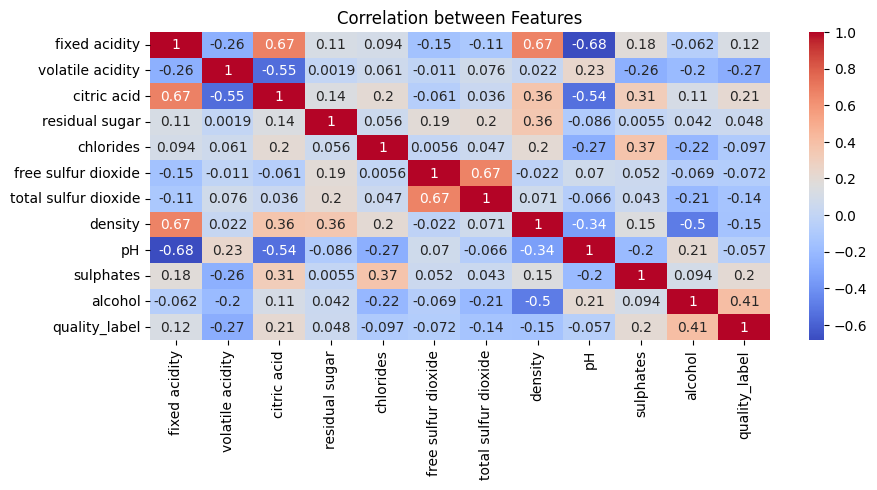

In [43]:
# Plot heatmap for correlation
plt.figure(figsize=(10, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Features")
plt.show()


##### The correlation heatmap reveals the relationships between different chemical properties and wine quality. We observe that certain features, such as alcohol and volatile acidity, show moderate correlation with wine quality. Positive correlations (e.g., alcohol content) suggest that higher levels of these features are associated with "Good" wines, while negative correlations (e.g., volatile acidity) suggest that higher levels may be associated with "Not Good" wines. These insights can guide feature selection and help interpret the model's predictions.

#### 5.3 Quality Distribution
Visualize the distribution of wines across the good and not good quality categories.


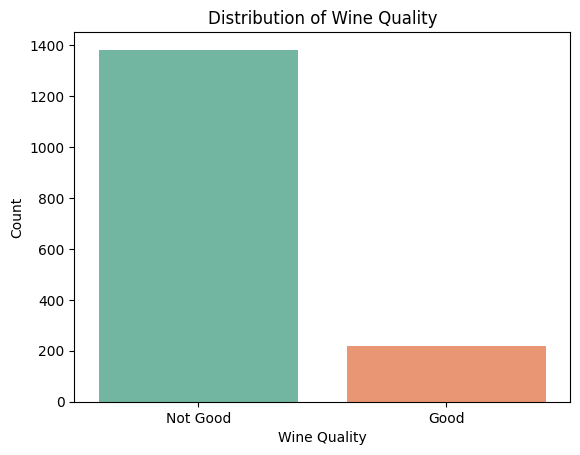

In [13]:
# Bar plot for quality distribution
sns.countplot(x='quality_label', data=data, palette="Set2")
plt.title("Distribution of Wine Quality")
plt.xticks([0, 1], ['Not Good', 'Good'])
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

##### The dataset is imbalanced, with significantly more instances of "Not Good" wines (approximately 1,400 samples) compared to "Good" wines (around 200 samples). This class imbalance may affect model performance, as the model could become biased towards predicting the majority class. To address this, we may need to consider techniques like class weighting or resampling to balance the dataset during model training.


---

### 6. Model Building and Evaluation

#### 6.1 Train-Test Split
We split the data into training (80%) and testing set (20%).


In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### 6.2 Build and Train the Neural Network
We use a simple feedforward neural network with three dense layers to classify the wine quality.


In [23]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6412 - loss: 0.6078 - val_accuracy: 0.8531 - val_loss: 0.3458
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.3106 - val_accuracy: 0.8562 - val_loss: 0.2960
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8657 - loss: 0.2979 - val_accuracy: 0.8687 - val_loss: 0.2815
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.2769 - val_accuracy: 0.8719 - val_loss: 0.2751
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8901 - loss: 0.2703 - val_accuracy: 0.8781 - val_loss: 0.2660
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8796 - loss: 0.2860 - val_accuracy: 0.8687 - val_loss: 0.2598
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.2425 - val_accuracy: 0.8750 - val_loss: 0.2551
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8894 - loss: 0.2624 - val_accuracy: 0.8687 - val_loss:

#### 6.3 Plot Training History
Let's plot the training and validation accuracy over epochs to visualize the training process.


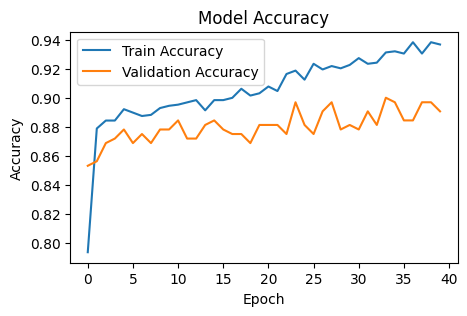

In [31]:
# Plot training & validation accuracy
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### 6.4 Model Evaluation
Evaluate the model's performance using accuracy, precision, recall, F1-score, and a confusion matrix.


The evaluation metrics provide a comprehensive view of the model's performance:

- **Accuracy**: This metric indicates the proportion of correctly classified samples in the test set.
- **Precision**: Precision tells us how many of the wines predicted as "Good" are truly "Good." High precision indicates fewer false positives.
- **Recall**: Recall indicates how many of the actual "Good" wines were correctly identified. High recall means fewer false negatives.
- **F1 Score**: The F1 Score is the harmonic mean of precision and recall, offering a balance between the two, especially useful for imbalanced datasets.
  
These metrics, along with the confusion matrix, help us understand the strengths and weaknesses of our model in classifying wines as "Good" or "Not Good." Given the imbalanced dataset, F1 Score is particularly useful as it considers both false positives and false negatives.


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
Model Evaluation Metrics:
Accuracy: 0.89
Precision: 0.70
Recall: 0.45
F1 Score: 0.55


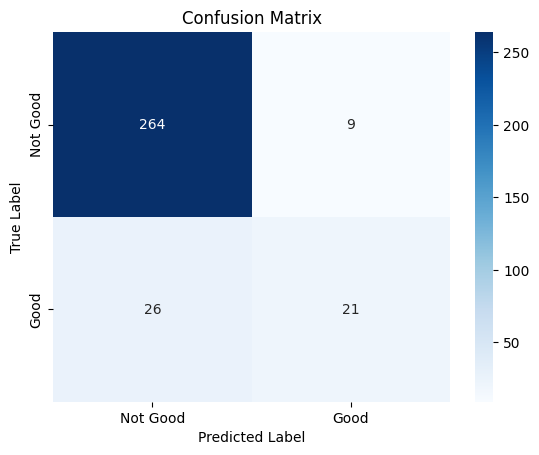

In [25]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix shows the breakdown of predictions by class, highlighting how well the model distinguishes between "Good" and "Not Good" wines.

- **True Positives (21)**: Wines correctly predicted as "Good."
- **True Negatives (264)**: Wines correctly predicted as "Not Good."
- **False Positives (9)**: Wines incorrectly predicted as "Good."
- **False Negatives (26)**: Wines incorrectly predicted as "Not Good."

For imbalanced datasets like this, it’s essential to minimize false negatives (missing out on "Good" wines) while maintaining low false positives. By interpreting the confusion matrix, we can identify areas where the model may need improvement, such as by tuning class weights or adjusting the decision threshold.


---

### 7. Conclusion
In this project, we developed a neural network to classify wines based on their chemical properties. Through data preprocessing, exploratory analysis, model building, and evaluation, we successfully trained a model to distinguish between "Good" and "Not Good" wines. 

Key insights include:
- Certain chemical properties, like alcohol and volatile acidity, were moderately correlated with wine quality.
- The dataset’s imbalance necessitated the use of metrics like F1 Score to better evaluate model performance.

Future improvements could include exploring other architectures, balancing techniques, or hyperparameter tuning. This model demonstrates a potential automated approach to wine quality assessment, aiding in quality control for wine producers.